In [1]:
# Autor: Ricardo Roberto de Lima - Profº - Unipê - Centro Universitário de João Pessoa
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Aula 01
#iago kellwen

#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [3]:
passageiros = pd.read_csv('Passageiros.csv')

In [4]:
passageiros.head(30)

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [5]:
#Exibindo as ultimas linhas do dataFrame.
passageiros.tail()

,tempo,nPassageiros
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [6]:
#Exibindo os dados estatísticos do dataFrame
passageiros.describe()

,tempo,nPassageiros
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


In [7]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='tempo', ylabel='nPassageiros'>

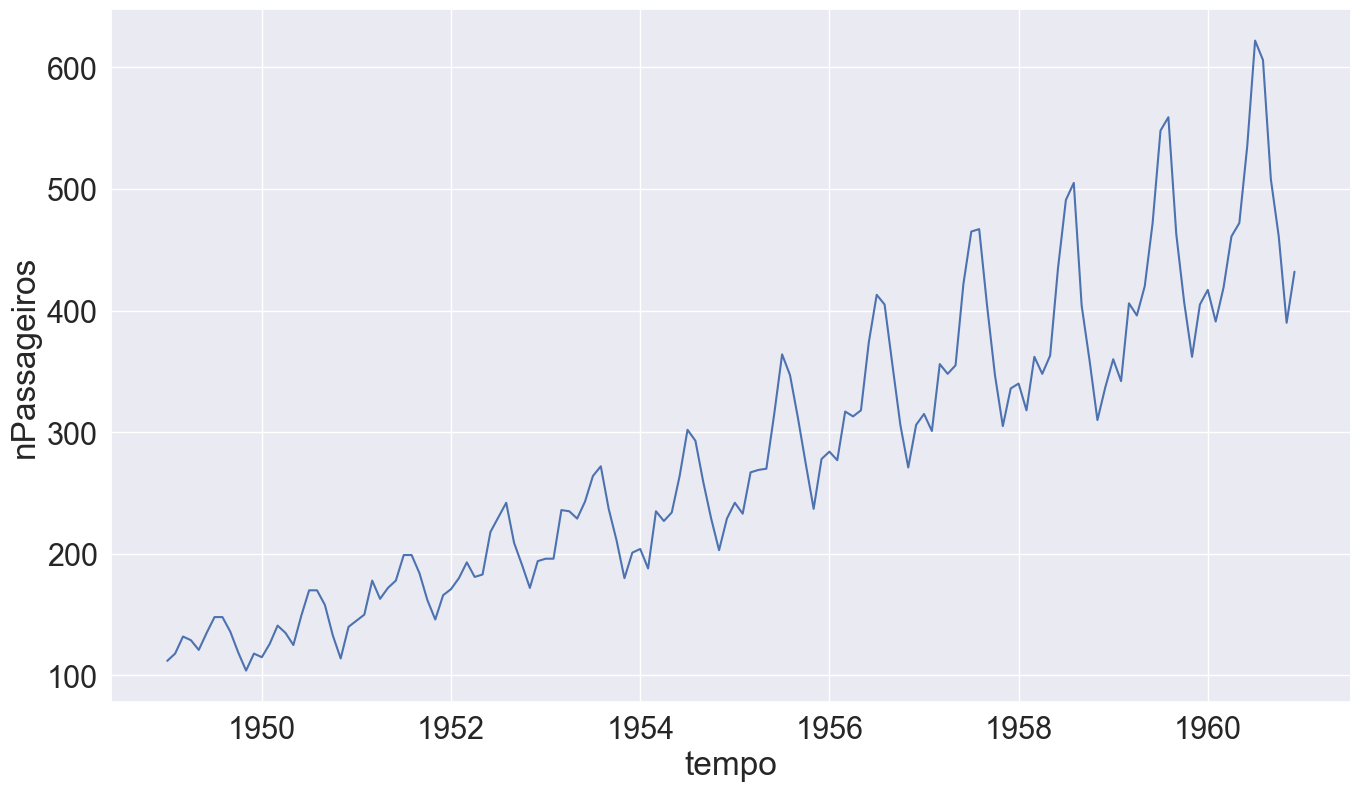

In [5]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [29]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [30]:
nPassageiros = passageiros.iloc[:,1].values

In [31]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [32]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [33]:
from sklearn import linear_model

In [34]:
regressor = linear_model.LinearRegression()

In [35]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression()

In [36]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [37]:
import numpy as np

In [38]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


<AxesSubplot:xlabel='Tempo', ylabel='nPassageiros'>

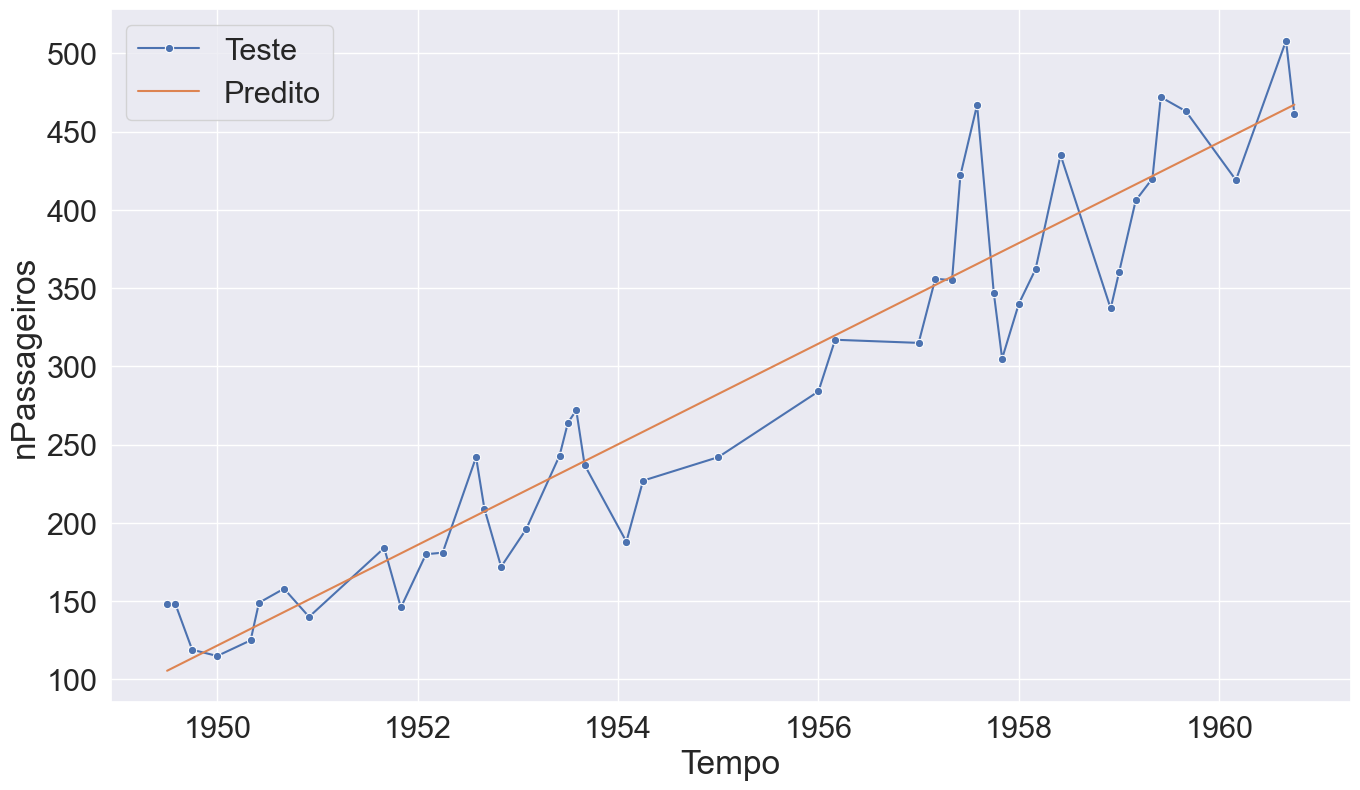

In [39]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [40]:
# Coeficientes
print('Coeficiente: \n', regressor.coef_)

Coeficiente: 
 [32.14197272]


In [42]:
# MSE (mean square error)
print("MSE: %.2f" % np.mean((regressor.predict(Tempo) - nPassageiros) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % regressor.score(Tempo, nPassageiros))

MSE: 2093.09
Score de variação: 0.85


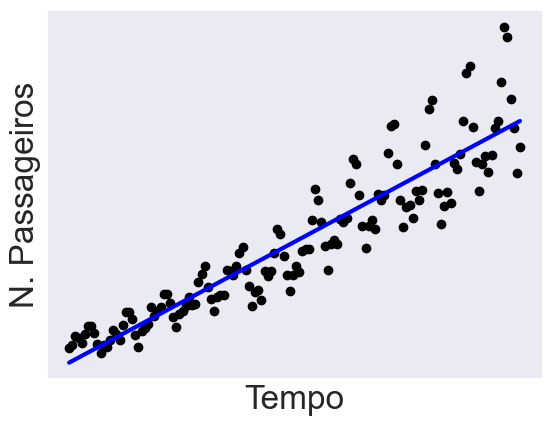

In [43]:
# Scatter Plot representando a regressão linear
plt.scatter(Tempo, nPassageiros,  color = 'black')
plt.plot(Tempo, regressor.predict(Tempo), color = 'blue', linewidth = 3)
plt.xlabel('Tempo')
plt.ylabel('N. Passageiros')
plt.xticks(())
plt.yticks(())

plt.show()